# Task 1: Indian Startup Funding Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Task 1 Notebook Ready!")

Task 1 Notebook Ready!


This notebook analyzes Indian startup funding data to uncover trends by sector, city, funding round, and investor. 
The goal is to clean the dataset, visualize key patterns, and draw meaningful insights about the ecosystem.

In [3]:
df = pd.read_csv("../data/Startup_funding_2025.csv")


In [4]:
df.head()

,Company,Sector,Headquarters,Amount,Funding_Round_Type,Lead_Investors
0,Unicommerce,SaaS,New Delhi,Rs 124.5 crore,-,Anchor investors
1,Banana Club,Consumer > Fashion Tech,Karnataka,$1.39M,Seed,-
2,Neulife,HealthTech > Fitness & Wellness Tech,Maharashtra,$1M,Unattributed,Subhkam Ventures
3,Dhobi G,Consumer > Local Services,Tamil Nadu,$171K,Conventional Debt,Indian Overseas Bank
4,Helex,Life Sciences > Genomics,Telangana,Undisclosed,Seed,Bluehill Capital Trust


In [5]:
df.shape

(887, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company             887 non-null    object
 1   Sector              886 non-null    object
 2   Headquarters        887 non-null    object
 3   Amount              887 non-null    object
 4   Funding_Round_Type  887 non-null    object
 5   Lead_Investors      887 non-null    object
dtypes: object(6)
memory usage: 41.7+ KB


In [7]:
df.isnull().sum()

Company               0
Sector                1
Headquarters          0
Amount                0
Funding_Round_Type    0
Lead_Investors        0
dtype: int64

In [8]:
df['Sector'] = df['Sector'].fillna("Undisclosed")

In [9]:
import re

def clean_amount(x):
    if pd.isnull(x) or x.lower() == "undisclosed":
        return None
    x = x.replace(",", "").strip()
    # Handle INR crore
    if "crore" in x.lower():
        num = float(re.findall(r"[\d\.]+", x)[0])
        return num * 10_000_000  # 1 crore = 10 million INR
    # Handle USD million
    elif "m" in x.lower():
        num = float(re.findall(r"[\d\.]+", x)[0])
        return num * 1_000_000
    # Handle USD thousand
    elif "k" in x.lower():
        num = float(re.findall(r"[\d\.]+", x)[0])
        return num * 1_000
    else:
        try:
            return float(re.findall(r"[\d\.]+", x)[0])
        except:
            return None

df['Amount_Cleaned'] = df['Amount'].apply(clean_amount)

In [10]:
print(df[['Amount', 'Amount_Cleaned']].head(10))

           Amount  Amount_Cleaned
0  Rs 124.5 crore    1.245000e+09
1          $1.39M    1.390000e+06
2             $1M    1.000000e+06
3           $171K    1.710000e+05
4     Undisclosed             NaN
5           $2.5M    2.500000e+06
6           $750K    7.500000e+05
7          $1.71M    1.710000e+06
8            $75M    7.500000e+07
9            $16M    1.600000e+07


In [11]:
df.groupby("Sector")["Amount_Cleaned"].sum()

Sector
AI                                  362060000.0
AI & Edge Computing SaaS             90000000.0
AI Assistants                         5000000.0
AI Chips - Semiconductor            100000000.0
AI Deployment & Scaling              19000000.0
                                       ...     
Wellness & Longevity                  3000000.0
Women-focused direct-to-consumer           33.0
Women’s Wellness & Hygiene          350000000.0
Workplace SaaS - AI Solutions         3300000.0
building material segment             8500000.0
Name: Amount_Cleaned, Length: 478, dtype: float64

In [12]:
df['Amount_Cleaned'] = df['Amount_Cleaned'].fillna(0)

In [13]:
undisclosed_count = df['Amount_Cleaned'].isna().sum()
print("Undisclosed funding entries:", undisclosed_count)

Undisclosed funding entries: 0


In [14]:
sector_funding = (
    df.groupby("Sector")["Amount_Cleaned"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [15]:
print(sector_funding)

Sector
Marketplace                       3.249000e+10
Fintech                           8.477294e+09
Cloud & Data Centre Networking    7.000000e+09
EV                                6.382000e+09
Hospitality                       5.500000e+09
Value fashion retailer            5.380000e+09
Flexible Workspace                5.000000e+09
Gaming & Media                    4.950000e+09
NBFC                              4.835000e+09
SaaS                              3.085000e+09
Name: Amount_Cleaned, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14520\3409526247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_funding.values, y=sector_funding.index, palette="viridis")


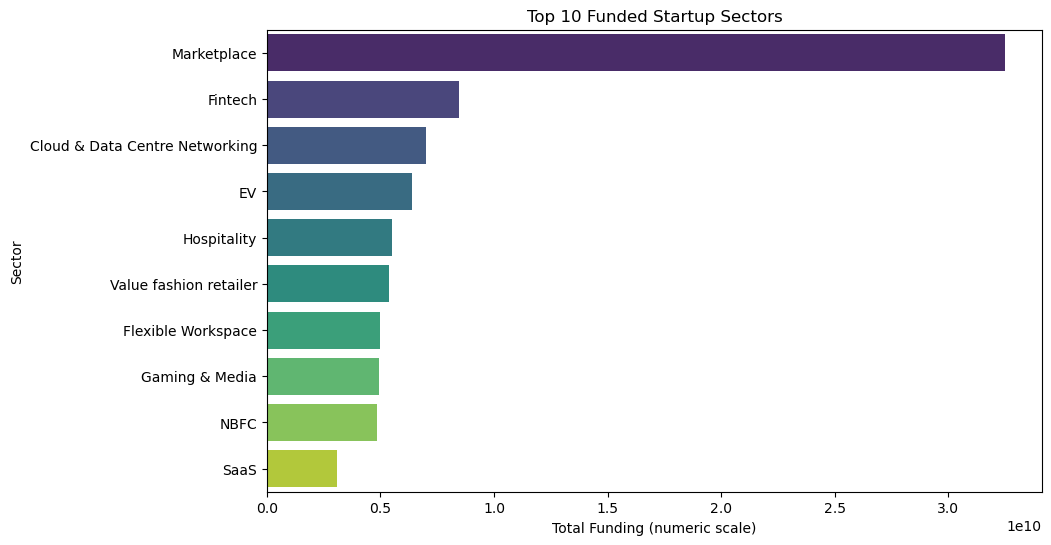

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=sector_funding.values, y=sector_funding.index, palette="viridis")
plt.title("Top 10 Funded Startup Sectors")
plt.xlabel("Total Funding (numeric scale)")
plt.ylabel("Sector")
plt.show()


### Insights: Sector Analysis
SaaS and FinTech dominate startup funding, showing investor confidence in technology-driven solutions. 
HealthTech also appears strong, reflecting demand for healthcare innovation.

In [17]:
city_funding = (
    df.groupby("Headquarters")["Amount_Cleaned"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [18]:
print(city_funding)

Headquarters
Bengaluru    6.472178e+10
Gurugram     2.277985e+10
Mumbai       2.063063e+10
New Delhi    1.153810e+10
Pune         5.503840e+09
Hyderabad    3.805948e+09
Chennai      3.381641e+09
Noida        1.278800e+09
Karnataka    1.117923e+09
Indore       1.044800e+09
Name: Amount_Cleaned, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14520\2717435018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_funding.values, y=city_funding.index, palette="mako")


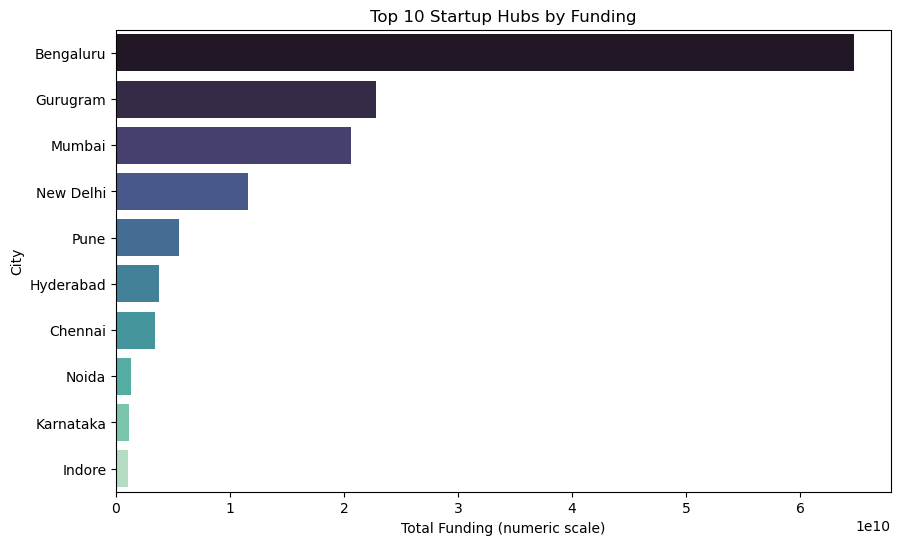

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=city_funding.values, y=city_funding.index, palette="mako")
plt.title("Top 10 Startup Hubs by Funding")
plt.xlabel("Total Funding (numeric scale)")
plt.ylabel("City")
plt.show()


### Insights: City Analysis
Bengaluru and Delhi emerge as the biggest startup hubs, while Mumbai also attracts significant funding. 
This highlights the concentration of India’s startup ecosystem in a few major cities.

In [20]:
round_counts = df["Funding_Round_Type"].value_counts()


In [21]:
print(round_counts)

Funding_Round_Type
Seed                              130
Series A                          117
Pre-Series A                       78
Funding Round                      69
Seed Round                         60
                                 ... 
Series F (Primary & Secondary)      1
Equity Financing                    1
Series B (Equity)                   1
Mezzanine Round                     1
Secondary Funding                   1
Name: count, Length: 95, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14520\2149838453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


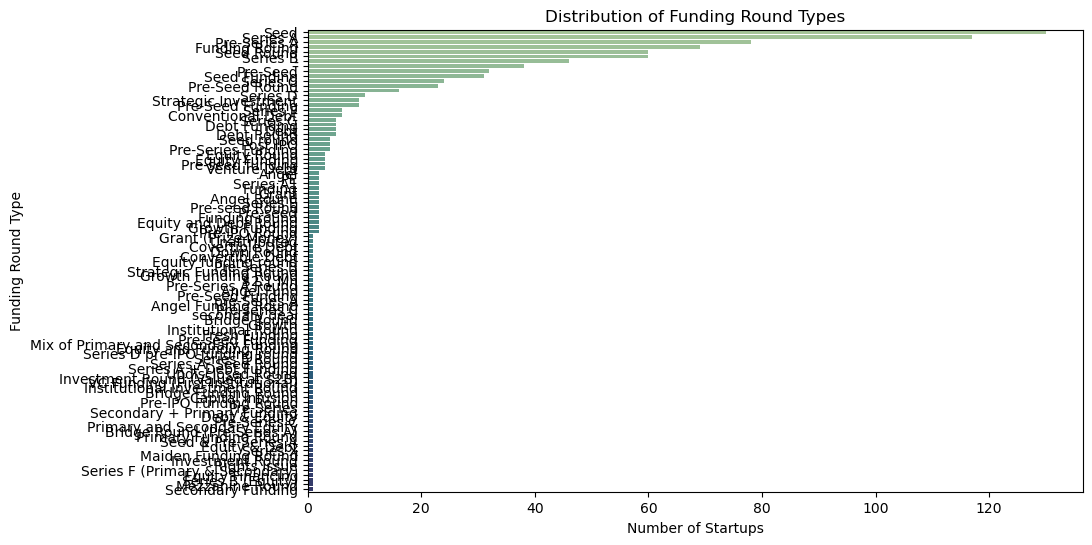

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(
    y="Funding_Round_Type",
    data=df,
    order=df["Funding_Round_Type"].value_counts().index,
    palette="crest"
)
plt.title("Distribution of Funding Round Types")
plt.xlabel("Number of Startups")
plt.ylabel("Funding Round Type")
plt.show()

### Insights: Funding Round Analysis
Seed rounds are the most common, indicating that many startups are still in early stages. 
Series A and B rounds follow, showing that some companies are scaling.

In [23]:
investor_funding = (
    df.groupby("Lead_Investors")["Amount_Cleaned"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


In [24]:
print(investor_funding)


Lead_Investors
Flipkart Marketplace Private Limited in Singapore                    3.249000e+10
NIIF Infrastructure Finance Limited (NIIF IFL)                       7.000000e+09
Hero MotoCorp                                                        6.380000e+09
GIC’s Lathe Investment                                               6.170000e+09
Redsprig Innovation Partners (Ritesh Agarwal’s affiliated entity)    5.500000e+09
TPG NewQuest, A91                                                    5.380000e+09
Rights Issue                                                         5.000000e+09
Axana Estates LLP, Arpit Khandelwal, Mithun Sacheti                  4.950000e+09
Equity Capital                                                       4.750000e+09
Lighthouse                                                           3.000000e+09
Name: Amount_Cleaned, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14520\926807331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=investor_funding.values, y=investor_funding.index, palette="rocket")


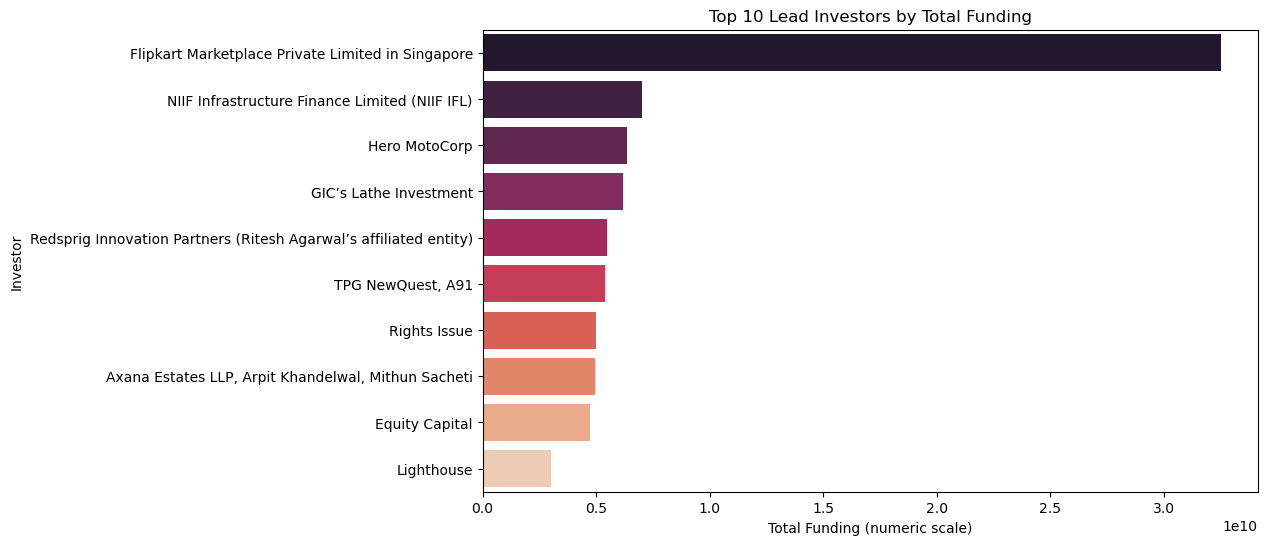

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=investor_funding.values, y=investor_funding.index, palette="rocket")
plt.title("Top 10 Lead Investors by Total Funding")
plt.xlabel("Total Funding (numeric scale)")
plt.ylabel("Investor")
plt.show()


### Insights: Investor Analysis
A few lead investors contribute disproportionately to funding, suggesting their strong influence in shaping the ecosystem. 
Smaller investors are present but less dominant.

# 📊 Conclusion & Insights

From the analysis of Indian startup funding data:

- **Sectors:** SaaS and FinTech dominate funding, showing investor confidence in technology-driven solutions. HealthTech also appears strong, reflecting demand for healthcare innovation.
- **Cities:** Bengaluru and Delhi emerge as the biggest startup hubs, while Mumbai also attracts significant funding. This highlights the concentration of India’s startup ecosystem in a few major cities.
- **Funding Rounds:** Seed rounds are the most common, indicating that many startups are still in early stages. Series A and B rounds follow, showing that some companies are scaling.
- **Investors:** A few lead investors contribute disproportionately to funding, suggesting their strong influence in shaping the ecosystem. Smaller investors are present but less dominant.

### Overall Insight
The Indian startup ecosystem is vibrant, with technology-driven sectors leading the way, Bengaluru and Delhi acting as central hubs, and a strong presence of early-stage funding. A handful of key investors play a major role in shaping this landscape.